## Práctica 1

### Introducción a la práctica

### __Variables de entrada__
En esta sección se explicarán qué representan las variables del dataset con una descripción, el tipo de variable (e.g.,categórica, numerica... etc.) y los valores posibles que estas pueden tomar en caso de ser categóricas.


#### **Datos de los clientes del banco**
> **Descripción:** Las variables que caen bajo este subconjunto son aquellas que están relacionadas con los datos del clientes del banco. Estas variables evalúan distintos factores del cliente, como su empleo, background educativo, préstamos... etc.


- **age** (Tipo: numérico): Edad del cliente.


- **job** (Tipo: categórico): Representa el tipo de trabajo que realiza el cliente. (Valores posibles: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self employed","services","student","technician","unemployed","unknown")


- **marital** (Tipo: categórico): Estado marital de cliente. (Valores posibles: "divorced","married","single","unknown"; note: "divorced" significa divorciado/a o viudo/a)


- **education** (Tipo: categórico): Nivel de educación del cliente. (Valores posibles: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")


- **default** (Tipo: categórico): Variable que indica si el cliente ha tenido impagos. (Valores posibles: "no","yes","unknown")


- **housing** (Tipo: categórico): Variable que indica si el cliente tiene un préstamo hipotecario. (Valores posibles: "no","yes","unknown")


- **loan** (Tipo: categórico): Variable que indica si el cliente tiene un crédito a título personal. (Valores posibles: "no","yes","unknown")



#### **Información relacionada con el último contacto en campaña**
> **Descripción:** La información en este subconjunto representa, para la campaña actual de captación de clientes del banco, distintas métricas sobre los clientes del banco. Esto es, veces que han sido llamados, si el contacto ha sido por telefono o por móvil... etc


- **contact** (Tipo: categórico): Método de comunicación con el cliente (Valores posibles: "cellular","telephone") 


- **month** (Tipo: categórico): Mes donde se estableció el último contacto con el cliente. (Valores posibles: "jan", "feb", "mar", ..., "nov", "dec")


- **day_of_week** (Tipo: categórico): Día de la semana donde se estableción el último contacto con el cliente (Valores posibles: "mon","tue","wed","thu","fri")


- **duration** (Tipo: numérico): Duración del último contacto que se tuvo con el cliente, en segundos. **Nota importante**: Este atributo afecta directamente a la clase que se está intentando predecir (e.g., if duration=0 then y="no"), siendo "y" el output a predecir. Esto quiere decir que, en un principio, este atributo es redundante, ya que, si todavía no se ha hecho una llamada al usuario una vez es cliente, la duración es 0, lo cual no es relevante. Este atributo por tanto, no debe ser considerado en caso de querer realizar un modelo predictvo.



#### **Otros atributos**
> **Descripción:** Otros atributos referentes a los clientes, como campañas del banco para la captación del cliente, días desde el último contacto con el cliente, resultados de la captación de clientes... etc.


- **campaign** (Tipo: numérico): Número de veces que se ha contactado al cliente en la campaña, incluído el último contacto. 


- **pdays** (Tipo: numérico): número de días que han pasado desde la última vez que se contacto al cliente en campaña. (numeric; - **Nota:** Si el valor es 999, significa que el cliente no ha sido contactado previamente)


- **previous** (Tipo: numérico): Cantidad de contactos realizados a dicho cliente antes de que empezase la campaña. 


- **poutcome** (Tipo: categórico): Resultado del marketing de la campaña. Basicamente, si se ha tenido éxito a la hora de captar al cliente en la campaña. (Valores posibles: "failure","nonexistent","success")



#### **Atributos socio-económicos**

> **Descripción**: Atributos no relevantes a los clientes ***per se***, si no mas bien a lo que rodea a dichos clientes, como pueden ser métricas o índices económicos.


- **emp.var.rate** (Tipo: numérico): Ratio de variación del empleo - ***Indicador cuatrimestral***. Indica la variación de la cantidad de personas están siendo despedidas y contratas en un intervalo de tiempo. Esta es una métrica que indica cómo de estables son los trabajos en el momento de análisis.


- **cons.price.idx (IPC)** (Tipo: numérico): Índices de precios al consumidor - ***monthly indicator***. Indice económico que evalúa el precio de un conjunto de bienes de primera necesidad(e.g., alimentos del hogar) estudiando si estos son mayor o menormente accesibles en base a las encuestas de los gastos de los hogares (donde a ***grosso modo*** se evalúa si vivir sale más caro o mas barato). Este valor es representado por un porcentaje, donde si el valor sale positivo, significa que ha habido un aumento de los precios y negativo, en caso de que hayan bajado.


- **cons.conf.idx** (Tipo: numérico): Índice de confianza del consumidor - ***monthly indicator***. Representa la confianza de crecimiento ecónomico que deposita el consumidor, esto se traduce en lo siguiente: si el consumidor esta consumiendo mas, significa un mayor consumo, lo que indica un crecimiento económico.


- **euribor3m**  (Tipo: numérico): Euribor a 3 meses rate - ***daily indicator***. Muestra el euribor a 3 meses. El Euribor es un ratio que mide la media de los intereses de los préstamos (excluyendo el 15% mas alto y bajo) que los bancos europeos se ceden entre sí. A mayor euribor, mayores intereses y por lo tanto, pedir prestamos sale mas caro, lo mismo ocurirrá de manera contraria.


- **nr.employed** (Tipo: numérico): número de empleados - ***quarterly indicator***.


### __Variable de salida (target):__
- **y** (Tipo: binario): ¿Se ha hecho el cliente un depósito a plazos en el banco? (Valores posibles: "yes","no")

#### Importación de las librerias

In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Cargamos el dataset

In [305]:
filename = 'bank-additional-full.csv'
missing_values = ['unknown']
df = pd.read_csv(filename, delimiter = ';', na_values = missing_values )
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Observamos el tipo de variables que están presentes en el dataset:

In [306]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


##### Análisis de los missing values

In [307]:
# Identifiquemos los missing values
def df_na_stats(df):
        df_nas = pd.isna(df)
        for col in df_nas.columns:
                nas = sum(df_nas[col])
                print(f'{col}:{nas} NA : {100*nas/len(df_nas[col])}%')

        withNa = sum(df_nas.apply(any, axis=1))
        print(f'El número total de registros con valor NA es: {withNa}, {(withNa/(df_nas.shape[0]*df_nas.shape[1]))*100}%')

df_na_stats(df)

age:0 NA : 0.0%
job:330 NA : 0.8012042342429834%
marital:80 NA : 0.1942313295134505%
education:1731 NA : 4.202680392347285%
default:8597 NA : 20.872584247839175%
housing:990 NA : 2.40361270272895%
loan:990 NA : 2.40361270272895%
contact:0 NA : 0.0%
month:0 NA : 0.0%
day_of_week:0 NA : 0.0%
duration:0 NA : 0.0%
campaign:0 NA : 0.0%
pdays:0 NA : 0.0%
previous:0 NA : 0.0%
poutcome:0 NA : 0.0%
emp.var.rate:0 NA : 0.0%
cons.price.idx:0 NA : 0.0%
cons.conf.idx:0 NA : 0.0%
euribor3m:0 NA : 0.0%
nr.employed:0 NA : 0.0%
y:0 NA : 0.0%
El número total de registros con valor NA es: 10700, 1.2370685867820954%


Sobre las variables con mayor valor procentaje de missing values: Tendríamos __default__ (impagos), con un 20.87%, __education__ con un 4.2% y __housing__ y __loan__ con un 2.404% ambos.

Los missing values ocurren en su totalidad en variables que son categóricas. El porcentaje de missing values que nos preocupa es __default__ con un 20%, ya que un valor muy alto de desinformación. Ante esto, tendremos que evaluar como poder rellenar los valores faltantes sin qe afecten a los datos que el dataset intenta representar.

In [308]:
# TODO: Código con la solución para los missing values del campo default.

Para el resto de las variables con __missing values__, al ser porcentajes pequeños, se podrían hacer varios aproaches ante este problema:
 - Utilizar modelos para inducir el valor a partir del resto de variables.
 - Tratar la categoría "missing value" como otro valor posible de la variable categórica.
 - Usar, en el caso de las variables categóricas, la moda de una de ellas para rellenar los missing values.
 - Ignorar los registros donde esta variable no tiene valor). 
 
Por comodidad, realizaremos esta última opción.

In [309]:
# TODO: Todavía no llamar a esta celda, porque hace drop de todos los valores unknown del atributo delfault (tasa de missing values del 20%)
#df.dropna()

In [310]:
# Llamamos de nuevo a la función df_na_stats, para sacar de nuevo los stats asociados a los NAs
df_na_stats(df)

age:0 NA : 0.0%
job:330 NA : 0.8012042342429834%
marital:80 NA : 0.1942313295134505%
education:1731 NA : 4.202680392347285%
default:8597 NA : 20.872584247839175%
housing:990 NA : 2.40361270272895%
loan:990 NA : 2.40361270272895%
contact:0 NA : 0.0%
month:0 NA : 0.0%
day_of_week:0 NA : 0.0%
duration:0 NA : 0.0%
campaign:0 NA : 0.0%
pdays:0 NA : 0.0%
previous:0 NA : 0.0%
poutcome:0 NA : 0.0%
emp.var.rate:0 NA : 0.0%
cons.price.idx:0 NA : 0.0%
cons.conf.idx:0 NA : 0.0%
euribor3m:0 NA : 0.0%
nr.employed:0 NA : 0.0%
y:0 NA : 0.0%
El número total de registros con valor NA es: 10700, 1.2370685867820954%


## Variables numéricas

#### Correlación variables numéricas.

Veamos si existe algún tipo de correlación entre las variables numéricas de nuestro dataset.

In [311]:
correlation  = df.corr()
correlation

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Aquí se puede observar que existen valores altos (cercanos a 1) dentro de la matriz de dispersión. Vamos a representarlos gráficamente para verlo con mayor claridad.

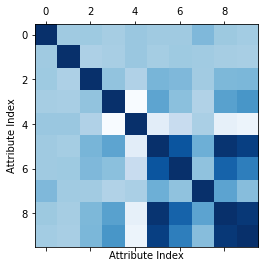

In [312]:
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()

Aquí se puede apreciar una correlación clara entre __emp.var.rate__ y __euribor3m__, y otra entre __euribor3m__ y __nr.employed__. También existe una correlación aparente entre __cons.price.idx__ y __emp.var.rate__.

Mostraremos los datos mediante la matriz de __scatter_plot__, en este caso las variables númericas son aquellas que serán representadas (de las categóricas nos encargaremos mas tarde).

<Figure size 432x288 with 0 Axes>

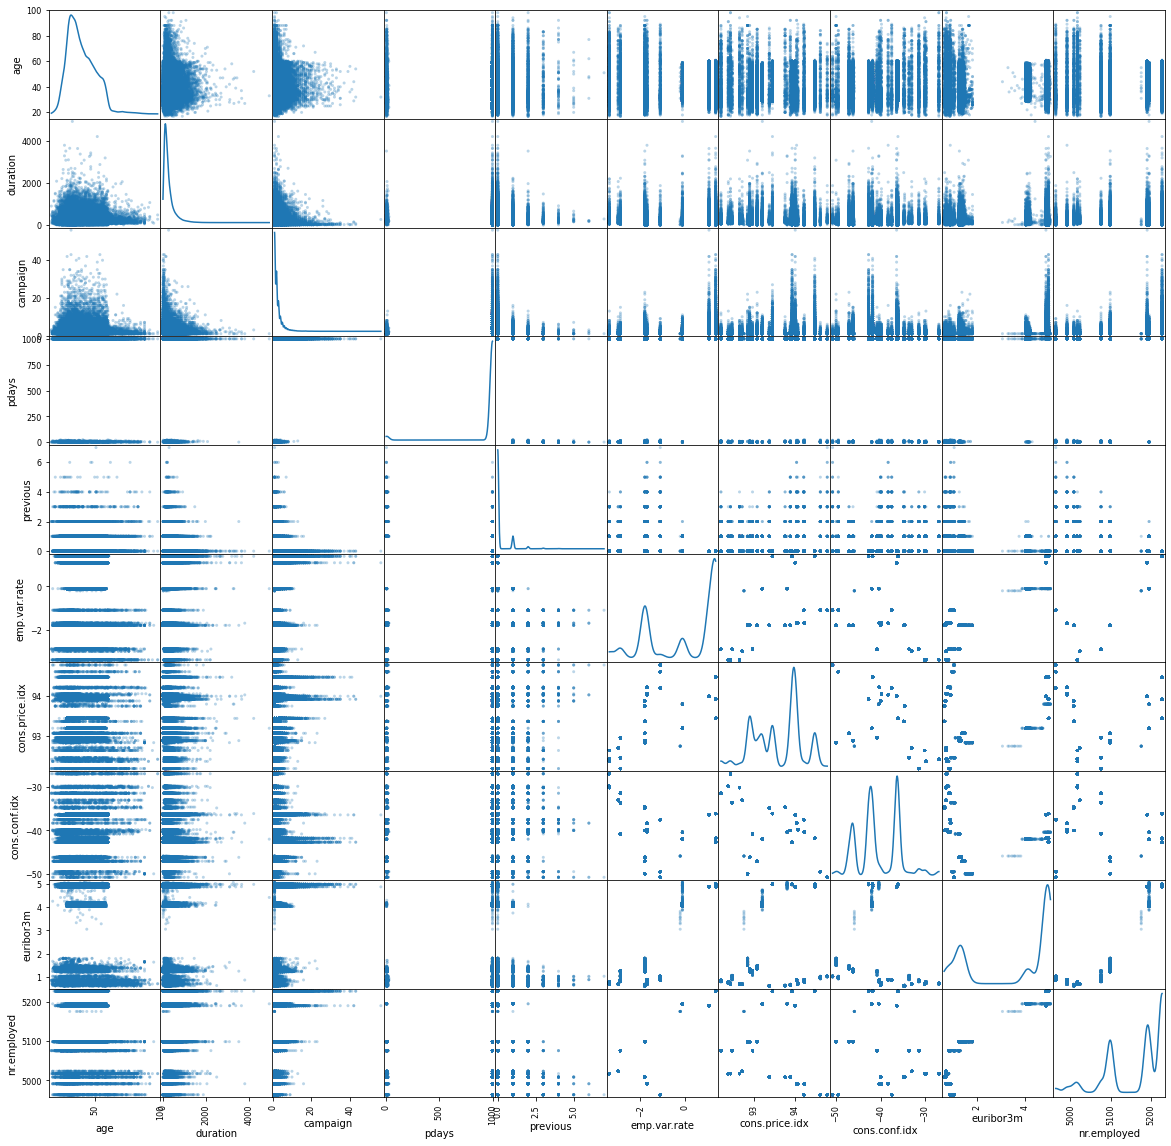

In [313]:
#### Scatter Matrix Plot

plt.figure()
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.3, figsize=(20, 20), diagonal='kde')
plt.show()

Viendo este gráfico de dispersión, vemos que los valores de muchas variables, pese a no ser categóricos, son discretos, ya que solo toman valores enteros. Esto hace que se vean, para cada celda, que representa el enfrentamiento de una variable frente a otra, distintos puntos agrupados a modo de estratos en ellas. Claro ejemplo de esto es, por ejemplo, la celda que enfrenta __previous__ frente a __campaign__ o __age__ frente a __nr.employed__.

Vemos que, en el dataset se aprecia, por ejemplo, que valores de las variables del dataset asociadas a atributos __socio-económicos__ (euribor, IPC... etc) están distribuidas en estratos también, y que no dependen de factores como la edad o la duración de las llamadas. Esto nos hace pensar que, los datos fueron recogidos en distintos intervalos temporales, ya que el valor del euribor es distinto para clientes con misma edad. Esto solo puede darse debido a que, en unas fechas, el euribor se ajustó para unos tipos de interes y en otras fechas para otro.

En los atributos asociados a los clientes y las campañas, vemos que existe una tendencia bajista entre la duración de las llamadas a los clientes (__duration__) y su edad (__age__). Ya que, como se puede observar en el gráfico, a partir de los 65-70 años, la duración de las llamadas desciende notablemente. Relacionado con esto, vemos que el número de contactos en campaña (atributo __campaign__) realizado con clientes según su edad, sigue la misma tendencia que duration, ya que, a partir de los 65-70 años, el número de contactos desciende de manera notable. 
En adición a esto, vemos que la duración de las llamadas suele ser mayor en los primeros contactos que se realizan sobre los clientes en campaña, y que, a medida que los clientes son contactados mas veces, la duración de las llamadas, desciende. Esto también se ve en el caso de los contactos previos a campaña (__previous__) frente a la duración. Las llamadas suelen durar menos, cuantas mas veces se ha contactado con un cliente antes de la campaña, lo que apoya nuestra teoría de que, a medida que se realizan mas llamadas a los clientes, estas suelen durar cada vez menos.

### Analisis variables categoricas

Creamos un boxplot que nos diga como de correladas están las variables duration e 'y', la variable predictora.

<AxesSubplot:xlabel='y', ylabel='duration'>

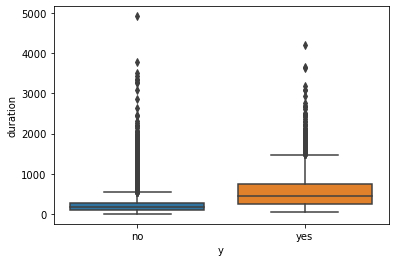

In [314]:
sns.boxplot(x='y', y='duration', data=df)

Creamos una variable dummy sobre la clase predictora (__y__), para poder estudiar su __correlación__ con las distintas variables que existen en el dataset. Según la descripción del dataset, la variable __duration__ es un falso predictor, al estar muy correlado con __y__, comprobamos esto en el siguiente bloque de código.

In [315]:
df_y_dummie = pd.get_dummies(df, columns=['y'])

In [316]:
correlation_duration_y  = df_y_dummie.corr()
correlation_duration_y

# TODO: Solo sale una correlación del 40%... no entiendo porque en el txt dice que la variable 'y' es completamente dependendiente de duration, 
# si luego no correla.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_no,y_yes
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,-0.030399,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,-0.405274,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,0.066357,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,0.324914,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,-0.230181,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,0.298334,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,0.136211,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,-0.054878,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,0.307771,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,0.354678,-0.354678


Tal y como se indica dentro del fichero __bank-additional-names.txt__, junto con la explicación dada al principio del notebook, la variable duration es un falso predictor. Esto es debido a que, se tiene por supuesto que antes de la llamada, la duration=0 y la y=no, lo cual no aporta ninguna información al dataset, ya que una vez realizada la llamada, el valor duration deja de ser 0 y la 'y' ya se conoce (se ha captado a un cliente para que deje un depósito o no). Es por esto, que esta variable será quitada del dataset.

In [317]:
df_no_dur = df.drop(columns='duration')

#### Normalización y transformación de los datos

In [318]:
# En primer lugar, realicemos una tranformación sobre los datos categóricos (codificación),
df_no_dur['housing'] = df_no_dur['housing'].replace(['yes','no'],[1,0])
df_no_dur['marital'] = df_no_dur['marital'].replace(['married','single','divorcied'], [2, 1, 0])
df_no_dur['loan'] = df_no_dur['loan'].replace(['yes','no'],[0,1])
df_no_dur['contact'] = df_no_dur['contact'].replace(['telephone','cellular'], [0,1])
df_no_dur['poutcome'] = df_no_dur['poutcome'].replace(['failure', 'nonexistent','success'], [0,1,2])
df_no_dur['day_of_week'] = df_no_dur['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'],[1,2,3,4,5])
df_no_dur['month'] = df_no_dur['month'].replace(['mar', 'apr','may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec', ],[1,2,3,4,5,6,7,8,9,10])
df_no_dur['education'] = df_no_dur['education'].replace(['illiterate','basic.4y','basic.6y','basic.9y', 'high.school','professional.course',  'university.degree'], [0,1,2,3,4,5,6])
df_no_dur['job'] = df_no_dur['job'].replace(['unemployed','student','retired','housemaid', 'blue-collar', 'technician','self-employed','services', 'admin.','management','entrepreneur'],[1,2,3,4,5,6,7,8,9,10,11])
df_no_dur['y'] = df_no_dur['y'].replace(['yes','no'],[1,0])

# TODO: revisar si esto realmente debería de ser así... porque si ponemos como nan, la mayoría de valores sería NaN. 999 indica que el cliente no ha sido 
# contactado previamente, por lo que ponerlo como nan no sé si es correcto.
# df['pdays'] = df['pdays'].replace([999],[np.nan])

Normalizaremos los datos que adoptan un conjunto de valores continuos en el espectro y que abarcan un amplio intervalo. En este caso, las variables seleccionadas serían __euribor3m__, __cons.conf.idx__, __nr.employed__ y __cons.price.idx__ ya que tienen valores dispares. Normalizarlos nos permitirá saber como de dispares son los valores con respecto a la media, dando una mayor visión de como de alejados o cercanos se encuentran los valores de la variable con respecto a los valores 'normales' (media).


In [319]:
# definimos la función minmax_norm, que se encargará, para una variable de entrada, retornar sus valores normalizados.

def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())

df_no_dur['euribor3m'] = minmax_norm(df_no_dur['euribor3m'])
df_no_dur['cons.conf.idx'] = minmax_norm(df_no_dur['cons.conf.idx'])
df_no_dur['nr.employed'] = minmax_norm(df_no_dur['nr.employed'])
df_no_dur['cons.price.idx'] = minmax_norm(df_no_dur['cons.price.idx'])

In [320]:
# Ya con todas las variables categóricas transformadas, determinemos si hubiese falsos predictores
# Para esto vamos a ver si alguna de los atributos numéricos tiene influye 
# decisivamente sobre la salida. De existir una fuerte correlación, habría que analizar
# si se tratase o no se un falso predictor.

# Para comprobarlo graficamente vamos a añadir a la matriz de correlación anterior la salida "y". 
df_pred = df_no_dur[['campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']]
correlation_pred  = df_pred.corr()
correlation_pred

,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
campaign,1.000000,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
emp.var.rate,0.150754,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.127836,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,-0.013733,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.135133,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,0.144095,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,-0.066357,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


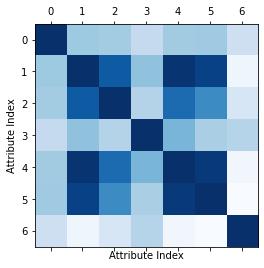

In [321]:
plt.figure()
plt.matshow(correlation_pred, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.xlabel("Attribute Index")
plt.show()
# Tal y como se observa en la matriz, no hay ninguna correlación fuerte entre las variables de entrada y de salida
# por lo que podemos concluir que no existen falsos predictores.

Aquí observamos que existe una correlación entre el __euribor3m__ y el __nr.employed__, y otra entre el __euribor3m__ y __emp.var.rate__ y entre __emp.var.rate__ y __nr.employed__.

In [322]:
# Por lo que eliminamos las variables emp.var.rate y nr.employed, ya que con euribor3m, tenemos una descripción de las otras dos variables, al estar 
# tan correladas
df_red = df_no_dur.drop(['emp.var.rate', 'nr.employed'], axis = 1)
df_red

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,4.0,2,1.0,no,0.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
1,57,8.0,2,4.0,NaN,0.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
2,37,8.0,2,4.0,no,1.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
3,40,9.0,2,2.0,no,0.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
4,56,8.0,2,4.0,no,0.0,0.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,3.0,2,5.0,no,1.0,1.0,1,9,5,1,999,0,1,1.000000,0.00000,0.089322,1
41184,46,5.0,2,5.0,no,0.0,1.0,1,9,5,1,999,0,1,1.000000,0.00000,0.089322,0
41185,56,3.0,2,6.0,no,1.0,1.0,1,9,5,2,999,0,1,1.000000,0.00000,0.089322,0
41186,44,6.0,2,5.0,no,0.0,1.0,1,9,5,1,999,0,1,1.000000,0.00000,0.089322,1


#### Análisis de los distintos estadísticos(__con outliers__)

In [323]:
#Los principales valores estadisticos, para cada variable
df_red.describe()

,age,job,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
count,41188.00000,40858.000000,39457.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,6.844314,4.160935,0.536743,0.844569,0.634748,4.607896,2.979581,2.567593,962.475454,0.172963,0.930101,0.535723,0.430854,0.677237,0.112654
std,10.42125,2.390499,1.638896,0.498654,0.362319,0.481507,2.040998,1.411514,2.770014,186.910907,0.494901,0.362886,0.225581,0.193648,0.393210,0.316173
min,17.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,5.000000,3.000000,0.000000,1.000000,0.000000,3.000000,2.000000,1.000000,999.000000,0.000000,1.000000,0.340608,0.338912,0.160961,0.000000
50%,38.00000,6.000000,4.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,999.000000,0.000000,1.000000,0.603274,0.376569,0.957379,0.000000
75%,47.00000,9.000000,6.000000,1.000000,1.000000,1.000000,6.000000,4.000000,3.000000,999.000000,0.000000,1.000000,0.698753,0.602510,0.980957,0.000000
max,98.00000,11.000000,6.000000,1.000000,1.000000,1.000000,10.000000,5.000000,56.000000,999.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [324]:
#Veamos los histogramas para mis variables,
columns = [
    'age',
    'job',
    'education',
    'housing',
    'loan',
    'contact',
    'month',
    'day_of_week',
    'duration',
    'campaign',
    'previous',
    'poutcome',
    'emp.var.rate',
    'cons.price.idx',
    'euribor3m',
    'nr.employed',
    'y'
    
]

'''fig, axs = plt.subplots(6,3, figsize = (20,20))
for n, col in enumerate(columns):
    i,j = n//3, n%3
    df[col].hist(ax = axs[i,j])'''

'fig, axs = plt.subplots(6,3, figsize = (20,20))\nfor n, col in enumerate(columns):\n    i,j = n//3, n%3\n    df[col].hist(ax = axs[i,j])'

#### Detección de outliers

Para este apartado vamos a calcular el número total de registros outliers para las variables numéricas. Para este caso, utilizamos el rango intercuartilico (IQR), el cual se encarga de ver la cantidad de valores que existen, desde el cuartil 25% y 75%, una unidad y media del IQR hacia la derecha (valores positivos) y hacia la izquierfa(valores negativos), para así determinar cuales son los valores 'outliers'.

In [325]:
# TODO: Revisar el porqué de seleccionar estas variables para calcular los outliers, se supone que son las númericas, pero 'loan', 'previous' o 'poutcome' 
# son categóricas.

cols = ['age',
#    'job', Esta es categórica, ¿Por qué esta aquí?
#    'loan', Esta es categórica, ¿Por qué esta aquí?
#    'duration',  DUDA: Esta ha sido eliminada del dataframe por su alta correlación con euribor3m, no entiendo porqué aqui vuelve a estar
#    'previous', Esta es categórica, ¿Por qué esta aquí?
#    'poutcome', Esta es categórica, ¿Por qué esta aquí?
#    'emp.var.rate', DUDA: Esta ha sido eliminada del dataframe por su alta correlación con euribor3m, no entiendo porqué aqui vuelve a estar
    'cons.price.idx',
    'euribor3m',
#    'nr.employed', DUDA: Esta ha sido eliminada del dataframe por su alta correlación con euribor3m, no entiendo porqué aqui vuelve a estar
]

Q1 = df_red[cols].quantile(0.25)
Q3 = df_red[cols].quantile(0.75)
IQR = Q3 - Q1

# TODO: revisar shape[0], ya que este indica el número de filas del dataframe, no el total de outliers que existen en el dataframe. 
outliers_df = df_red[~((df_red[cols]<(Q1-1.5*IQR)) | (df_red[cols]>(Q3+1.5*IQR))).any(axis=1)]
total_outliers = outliers_df.shape[0]
print(f'El número total de outliers en el dataframe es: {total_outliers}')

El número total de outliers en el dataframe es: 40719


El valor obtenido, es dado sobre todas las variables del dataset, es decir, dentro de todos los valores de todas las variables, desglosemoslo, viendo por cada variable, cuantos outliers se tienen.

In [328]:
# El dataframe que contiene los outliers es el siguiente (creo que el cálculo no es del todo correcto, salen muchos outliers)
df_red[~((df_red[cols]<(Q1- 1.5*IQR)) | (df_red[cols]>(Q3+1.5*IQR))).any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,4.0,2,1.0,no,0.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
1,57,8.0,2,4.0,NaN,0.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
2,37,8.0,2,4.0,no,1.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
3,40,9.0,2,2.0,no,0.0,1.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
4,56,8.0,2,4.0,no,0.0,0.0,0,3,1,1,999,0,1,0.698753,0.60251,0.957379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,9.0,2,6.0,no,1.0,1.0,1,9,5,1,999,0,1,1.000000,0.00000,0.089322,1
41182,29,1.0,1,1.0,no,1.0,1.0,1,9,5,1,9,1,2,1.000000,0.00000,0.089322,0
41184,46,5.0,2,5.0,no,0.0,1.0,1,9,5,1,999,0,1,1.000000,0.00000,0.089322,0
41185,56,3.0,2,6.0,no,1.0,1.0,1,9,5,2,999,0,1,1.000000,0.00000,0.089322,0


In [329]:
outliers_per_attr = {}
for col in cols:
    outliers_per_attr[col] = outliers_df[col].count()

print("Los outliers observados por campo, son los siguientes: \n")

for col in cols:
    print(col + " | " + str(outliers_per_attr[col]))

Los outliers observados por campo, son los siguientes: 

age | 40719
cons.price.idx | 40719
euribor3m | 40719
